# Challenge - Instagram Style Photo Collage

Use OpenCV and Numpy to build a photo collage

In this exercise, you will build a photo collage using 5 images of pokemon as given in the dataset. The sample collage image and images to use in the collage are given in the Dataset folder.



Submission Instructions You need to resize each pokemon 200X200 before using it. The final image should have size 430 X 430 px

(10 border + 200 pokemon + 10 border + 200 pokemon + 10 border = 430 px) along row and column.

After that you need to convert the final image into a single .csv file of the shape (rows x cols, 3). Your accuracy will be based on percentage of values matched with our file. The CSV file should have a header "r,g,b" as column names.

### * Import All the files

In [27]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

### * Reading images from Dataset

In [28]:
center = cv2.imread('./Dataset/center.jpeg')
center = cv2.cvtColor(center,cv2.COLOR_BGR2RGB)
bottom_left = cv2.imread('./Dataset/bottom_left.jpg')
bottom_left = cv2.cvtColor(bottom_left,cv2.COLOR_BGR2RGB)
bottom_right = cv2.imread('./Dataset/bottom_right.jpg')
bottom_right = cv2.cvtColor(bottom_right,cv2.COLOR_BGR2RGB)
top_left = cv2.imread('./Dataset/top_left.jpg')
top_left = cv2.cvtColor(top_left,cv2.COLOR_BGR2RGB)
top_right = cv2.imread('./Dataset/top_right.jpg')
top_right = cv2.cvtColor(top_right,cv2.COLOR_BGR2RGB)

#### * Plotting All Images

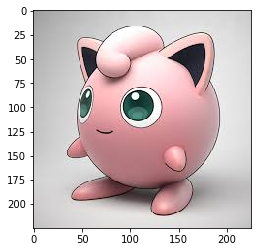

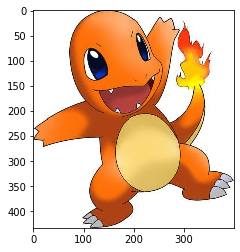

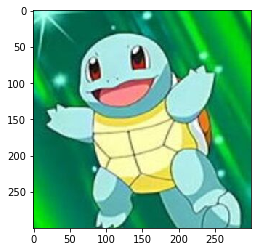

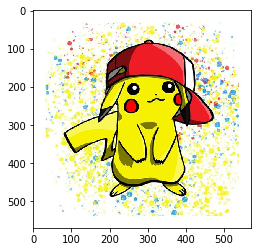

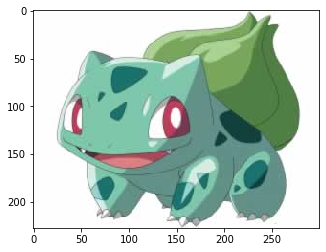

In [29]:
plt.imshow(center)
plt.show()
plt.imshow(bottom_left)
plt.show()
plt.imshow(bottom_right)
plt.show()
plt.imshow(top_left)
plt.show()
plt.imshow(top_right)
plt.show()

In [30]:
print(center.shape)
print(bottom_left.shape)
print(bottom_right.shape)
print(top_left.shape)
print(top_right.shape)

(225, 225, 3)
(434, 400, 3)
(300, 300, 3)
(570, 570, 3)
(228, 300, 3)


In [31]:
center = cv2.resize(center,(100,100))
bottom_left = cv2.resize(bottom_left,(200,200))
bottom_right = cv2.resize(bottom_right,(200,200))
top_left = cv2.resize(top_left,(200,200))
top_right = cv2.resize(top_right,(200,200))

In [32]:
print(center.shape)
print(bottom_left.shape)
print(bottom_right.shape)
print(top_left.shape)
print(top_right.shape)

(100, 100, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)


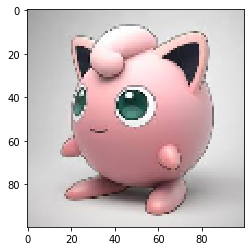

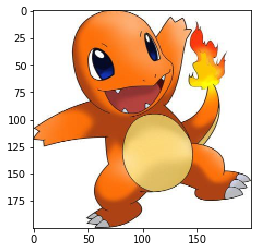

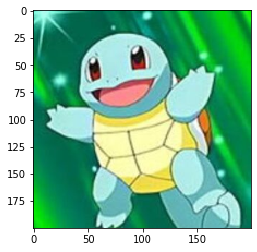

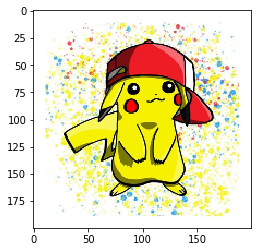

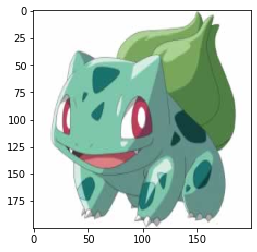

In [33]:
plt.imshow(center)
plt.show()
plt.imshow(bottom_left)
plt.show()
plt.imshow(bottom_right)
plt.show()
plt.imshow(top_left)
plt.show()
plt.imshow(top_right)
plt.show()

In [34]:
def create_blank_black_canvas(width, height):
    image = np.zeros((height, width, 3), np.uint8)
    return image

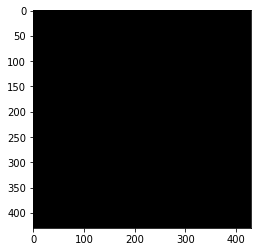

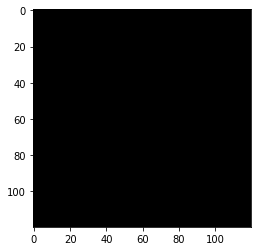

In [35]:
canvas = create_blank_black_canvas(430, 430)
canvas_for_center = create_blank_black_canvas(120, 120)
plt.imshow(canvas)
plt.show()
plt.imshow(canvas_for_center)
plt.show()

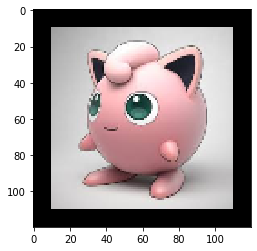

In [36]:
canvas_for_center[10:110,10:110] = center
plt.imshow(canvas_for_center)
plt.show()

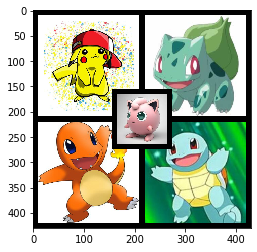

In [37]:
canvas[10:210,10:210] = top_left
canvas[10:210,220:420] = top_right
canvas[220:420,10:210] = bottom_left
canvas[220:420,220:420] = bottom_right
canvas[155:275,155:275] = canvas_for_center
plt.imshow(canvas)
plt.show()

In [38]:
canvas = cv2.cvtColor(canvas,cv2.COLOR_RGB2BGR)

cv2.imwrite('sample_img.jpeg',canvas)

True

In [39]:
r_channel = canvas[:,:,2]
g_channel = canvas[:,:,1]
b_channel = canvas[:,:,0]

r_channel = r_channel.reshape((430*430,1))
g_channel = g_channel.reshape((430*430,1))
b_channel = b_channel.reshape((430*430,1))

img = np.hstack((r_channel,g_channel,b_channel))

In [40]:
print(img.shape)

df = pd.DataFrame(img,columns=['r','g','b'])

df.to_csv("Final.csv",index=False)

(184900, 3)


 #### Final.csv will check the accuracy after submitting.